# Importing Library

In [1432]:
import pandas as pd                 #import pandas with the alias pd
import numpy as np                  #import numpy with the alias np
import matplotlib.pyplot as plt     #impot matplotlib.pyplot with the alias plt
import seaborn as sns               #import seaborn with the alias sns
from sklearn.model_selection import train_test_split        #import train_test_split from sklearn.model_selection
from sklearn import svm, feature_selection, linear_model, metrics       #import svm, feature_selection, linear_model, metrics from sklearn
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve       #import accuracy_score, precision_recall_curve, roc_curve from sklearn.metrics
from sklearn.model_selection import cross_val_score     #import cross_val_score from sklearn.model_selection
from sklearn.cluster import KMeans      #import KMeans from sklearn.cluster
from sklearn.decomposition import PCA       #import PCA from sklearn.decomposition

# Part 1

## Data Munging (Data Cleaning and Transformation)

### Reading File

In [1433]:
df_diabetic_csv = pd.read_csv('diabetic_data.csv')

### Shape of the Dataframe

In [1434]:
df_diabetic_csv.shape

(101766, 50)

### Deleting the "encounter_id" Column

In [1435]:
df_diabetic_csv.drop('encounter_id', axis=1, inplace=True)

### Shape of the Dataframe after deleting the column

In [1436]:
df_diabetic_csv.shape

(101766, 49)

### Identifing the missing values in dataframe

In [1437]:
df_summary_missing = df_diabetic_csv.isnull().sum()
df_summary_missing

patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Replacing the character '?' with NaN

In [1438]:
df_diabetic_csv = df_diabetic_csv.replace('?', np.nan)

### Summary of missing values in the dataframe after replacing '?' with NaN

In [1439]:
df_summary_missing = df_diabetic_csv.isnull().sum()
print(df_summary_missing)

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Replacing the values ‘<30’ with a 1 and ‘>30’ and ‘NO’ to 0 in "readmitted" column

In [1440]:
df_diabetic_csv['readmitted'] = df_diabetic_csv['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

C:\Users\pruthviraj.s\AppData\Local\Temp\ipykernel_21440\4231981717.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_diabetic_csv['readmitted'] = df_diabetic_csv['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})


### keeping a copy of cleaned dataframe for Part 2

In [1441]:
df_diabetic_csv_part2 = df_diabetic_csv

### Datatypes of each column

In [1442]:
df_column_data_types = df_diabetic_csv.dtypes
df_column_data_types

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

### Calculate the percentage of missing values in each column

In [1443]:
missing_values_percentage = (df_diabetic_csv.isnull().mean() * 100)
missing_values_percentage

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

### Droping the columns with more than 90% missing values

In [1444]:
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index

# Drop the identified columns from the DataFrame
df_diabetic_csv = df_diabetic_csv.drop(columns=columns_to_drop)

### Shape of the Dataframe after droping the columns with >90% of missing values

In [1445]:
df_diabetic_csv.shape

(101766, 47)

### List of Zero variance columns

In [1446]:
zero_variance_columns = ['repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
                         'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide',
                         'citoglipton','glyburide-metformin','glipizide-metformin',
                         'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

### Dropping the list of Zero Variance Columns

In [1447]:
df_diabetic_csv = df_diabetic_csv.drop(columns=zero_variance_columns)

### Shape of Dataframe after dropping the zero variance columns

In [1448]:
df_diabetic_csv.shape

(101766, 30)

### Dropping rows with null values

In [1449]:
df_diabetic_csv = df_diabetic_csv.dropna()

### Shape of Dataframe after dropping the rows with null values

In [1450]:
df_diabetic_csv.shape

(4166, 30)

### summary statistics of the numerical columns

In [1451]:
df_numerical_columns = df_diabetic_csv.select_dtypes(include=['int64','float64']).columns
numerical_summary = df_diabetic_csv[df_numerical_columns].describe()
numerical_summary

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,4.166000e+03,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000
mean,6.124034e+07,1.833413,2.697312,5.148104,4.944311,53.853577,1.292847,16.390302,0.195151,0.279885,0.456553,7.325012,0.095055
std,3.936169e+07,0.753764,4.024514,2.673494,3.107173,16.695628,1.704082,8.635939,0.813798,1.128657,1.109993,1.923753,0.293326
min,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,2.480188e+07,1.000000,1.000000,1.000000,3.000000,44.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,5.984079e+07,2.000000,1.000000,7.000000,4.000000,54.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,9.483692e+07,2.000000,3.000000,7.000000,7.000000,65.000000,2.000000,21.000000,0.000000,0.000000,0.000000,9.000000,0.000000
max,1.886349e+08,6.000000,28.000000,22.000000,14.000000,132.000000,6.000000,75.000000,13.000000,20.000000,12.000000,16.000000,1.000000


### Identifying and removing outliers in dataframe

**Columns omited from removing outliers**

['patient_nbr','admission_type_id',
'discharge_disposition_id','admission_source_id','readmitted']

The above columns are omited because ther are either identifier, categorical IDs, binary outcome variable.

In [1452]:
df_outliers_columns = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
                       'number_outpatient','number_emergency','number_inpatient','number_diagnoses']

for q_col in df_outliers_columns:
    # Calculate summary statistics
    Q1 = np.percentile(df_diabetic_csv[q_col], 25)
    Q3 = np.percentile(df_diabetic_csv[q_col], 75)
    IQR = Q3 - Q1

    # Define threshold for outliers
    upper_Q = Q3+1.5*IQR
    lower_Q = Q1-1.5*IQR

    # Filter out outliers for the current column
    df_diabetic_csv = df_diabetic_csv [(df_diabetic_csv[q_col]>=lower_Q) & (df_diabetic_csv[q_col]<=upper_Q)]
    
    # Print summary statistics
    print(q_col,Q1,Q3,IQR,upper_Q,lower_Q)
    
df_diabetic_csv.shape

time_in_hospital 3.0 7.0 4.0 13.0 -3.0
num_lab_procedures 44.0 65.0 21.0 96.5 12.5
num_procedures 0.0 2.0 2.0 5.0 -3.0
num_medications 10.0 20.0 10.0 35.0 -5.0
number_outpatient 0.0 0.0 0.0 0.0 0.0
number_emergency 0.0 0.0 0.0 0.0 0.0
number_inpatient 0.0 0.0 0.0 0.0 0.0
number_diagnoses 5.0 9.0 4.0 15.0 -1.0


(2403, 30)

### Summary of the cleaned dataframe

In [1453]:
df_diabetic_csv.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,2.403000e+03,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.0,2403.0,2403.0,2403.000000,2403.000000
mean,5.588758e+07,1.766542,2.506450,5.139825,4.603412,54.614232,1.039950,14.633375,0.0,0.0,0.0,6.930920,0.078236
std,4.131130e+07,0.733982,3.908117,2.637321,2.795936,14.604777,1.396463,6.748547,0.0,0.0,0.0,1.966045,0.268598
min,7.290000e+02,1.000000,1.000000,1.000000,1.000000,13.000000,0.000000,1.000000,0.0,0.0,0.0,3.000000,0.000000
25%,1.914768e+07,1.000000,1.000000,1.000000,3.000000,44.000000,0.000000,10.000000,0.0,0.0,0.0,5.000000,0.000000
50%,4.390628e+07,2.000000,1.000000,7.000000,4.000000,54.000000,0.000000,14.000000,0.0,0.0,0.0,7.000000,0.000000
75%,9.409732e+07,2.000000,3.000000,7.000000,6.000000,65.000000,2.000000,19.000000,0.0,0.0,0.0,9.000000,0.000000
max,1.886349e+08,6.000000,24.000000,17.000000,13.000000,96.000000,5.000000,35.000000,0.0,0.0,0.0,13.000000,1.000000


### Removing the columns with zero variance and updating the numerical columns

In [1454]:
# Remove columns with zero values
outlier_zero_columns = ['number_outpatient','number_emergency','number_inpatient']
df_diabetic_csv.drop(outlier_zero_columns, axis=1, inplace=True)

#update the numerical columns
df_numerical_columns = df_diabetic_csv.select_dtypes(include=['int64','float64']).columns

### Feature normalisation

In [1455]:
df_norm = df_diabetic_csv[df_numerical_columns]

# Normalizing the numerical columns using min-max scaling
data_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())

# Replacing the numerical columns in the original dataframe with the normalized values
df_diabetic_csv[df_numerical_columns] = data_norm

# Generating descriptive statistics for the normalized numerical columns in dataframe
df_diabetic_csv.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted
count,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000
mean,0.296271,0.153308,0.065498,0.258739,0.300284,0.501376,0.207990,0.400982,0.393092,0.078236
std,0.219002,0.146796,0.169918,0.164833,0.232995,0.175961,0.279293,0.198487,0.196605,0.268598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101503,0.000000,0.000000,0.000000,0.166667,0.373494,0.000000,0.264706,0.200000,0.000000
50%,0.232755,0.200000,0.000000,0.375000,0.250000,0.493976,0.000000,0.382353,0.400000,0.000000
75%,0.498831,0.200000,0.086957,0.375000,0.416667,0.626506,0.400000,0.529412,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualisation

### Plotting distribution of unique classes of the target variable, i.e., readmitted

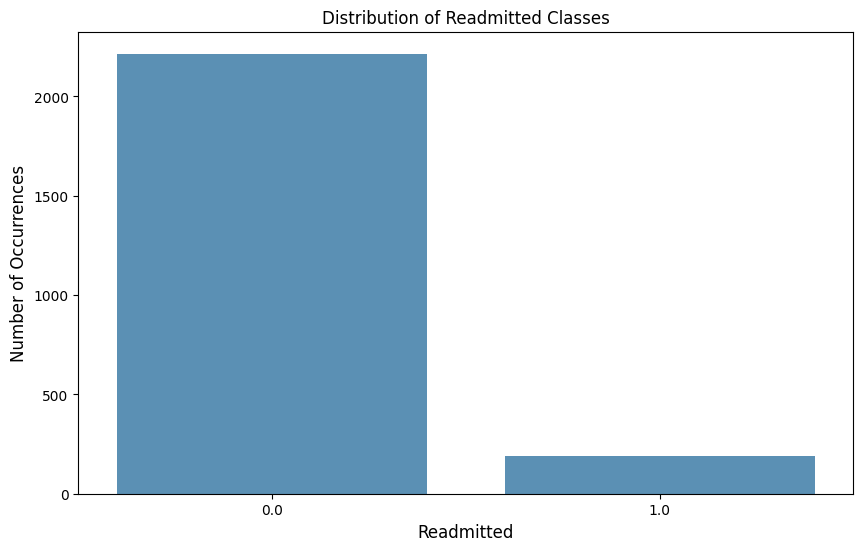

In [1456]:
class_counts = df_diabetic_csv['readmitted'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Distribution of Readmitted Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Readmitted', fontsize=12)
plt.show()

### Plotting the count of number of readmitted cases against age.

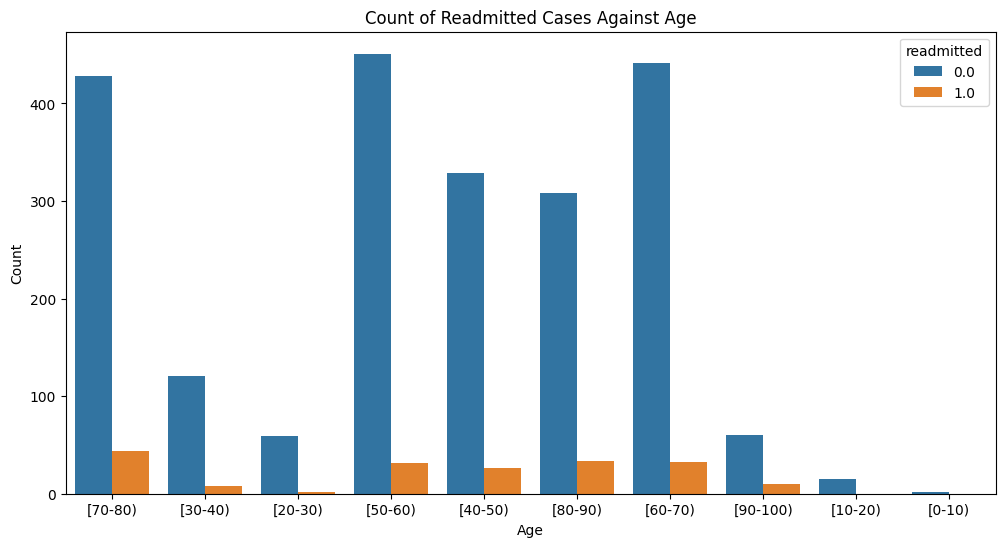

In [1457]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', hue='readmitted', data=df_diabetic_csv)
plt.title('Count of Readmitted Cases Against Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Plotting the count of target variable against the number of medications.

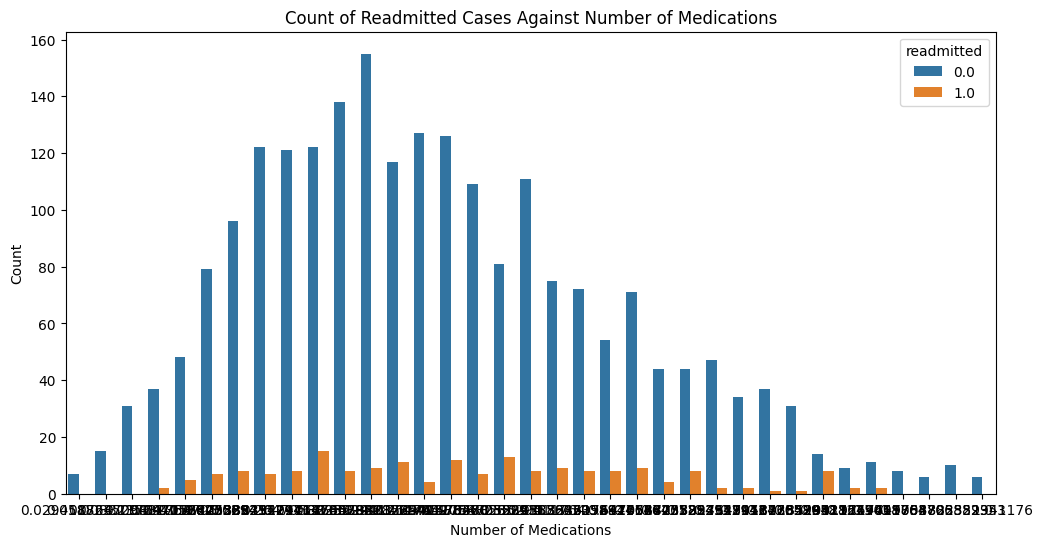

In [1458]:
plt.figure(figsize=(12,6))
sns.countplot(x='num_medications', hue='readmitted', data=df_diabetic_csv)
plt.title('Count of Readmitted Cases Against Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.show()

### Plotting scatter matrix

array([[<Axes: xlabel='patient_nbr', ylabel='patient_nbr'>,
        <Axes: xlabel='admission_type_id', ylabel='patient_nbr'>,
        <Axes: xlabel='discharge_disposition_id', ylabel='patient_nbr'>,
        <Axes: xlabel='admission_source_id', ylabel='patient_nbr'>,
        <Axes: xlabel='time_in_hospital', ylabel='patient_nbr'>,
        <Axes: xlabel='num_lab_procedures', ylabel='patient_nbr'>,
        <Axes: xlabel='num_procedures', ylabel='patient_nbr'>,
        <Axes: xlabel='num_medications', ylabel='patient_nbr'>,
        <Axes: xlabel='number_diagnoses', ylabel='patient_nbr'>,
        <Axes: xlabel='readmitted', ylabel='patient_nbr'>],
       [<Axes: xlabel='patient_nbr', ylabel='admission_type_id'>,
        <Axes: xlabel='admission_type_id', ylabel='admission_type_id'>,
        <Axes: xlabel='discharge_disposition_id', ylabel='admission_type_id'>,
        <Axes: xlabel='admission_source_id', ylabel='admission_type_id'>,
        <Axes: xlabel='time_in_hospital', ylabel='admissio

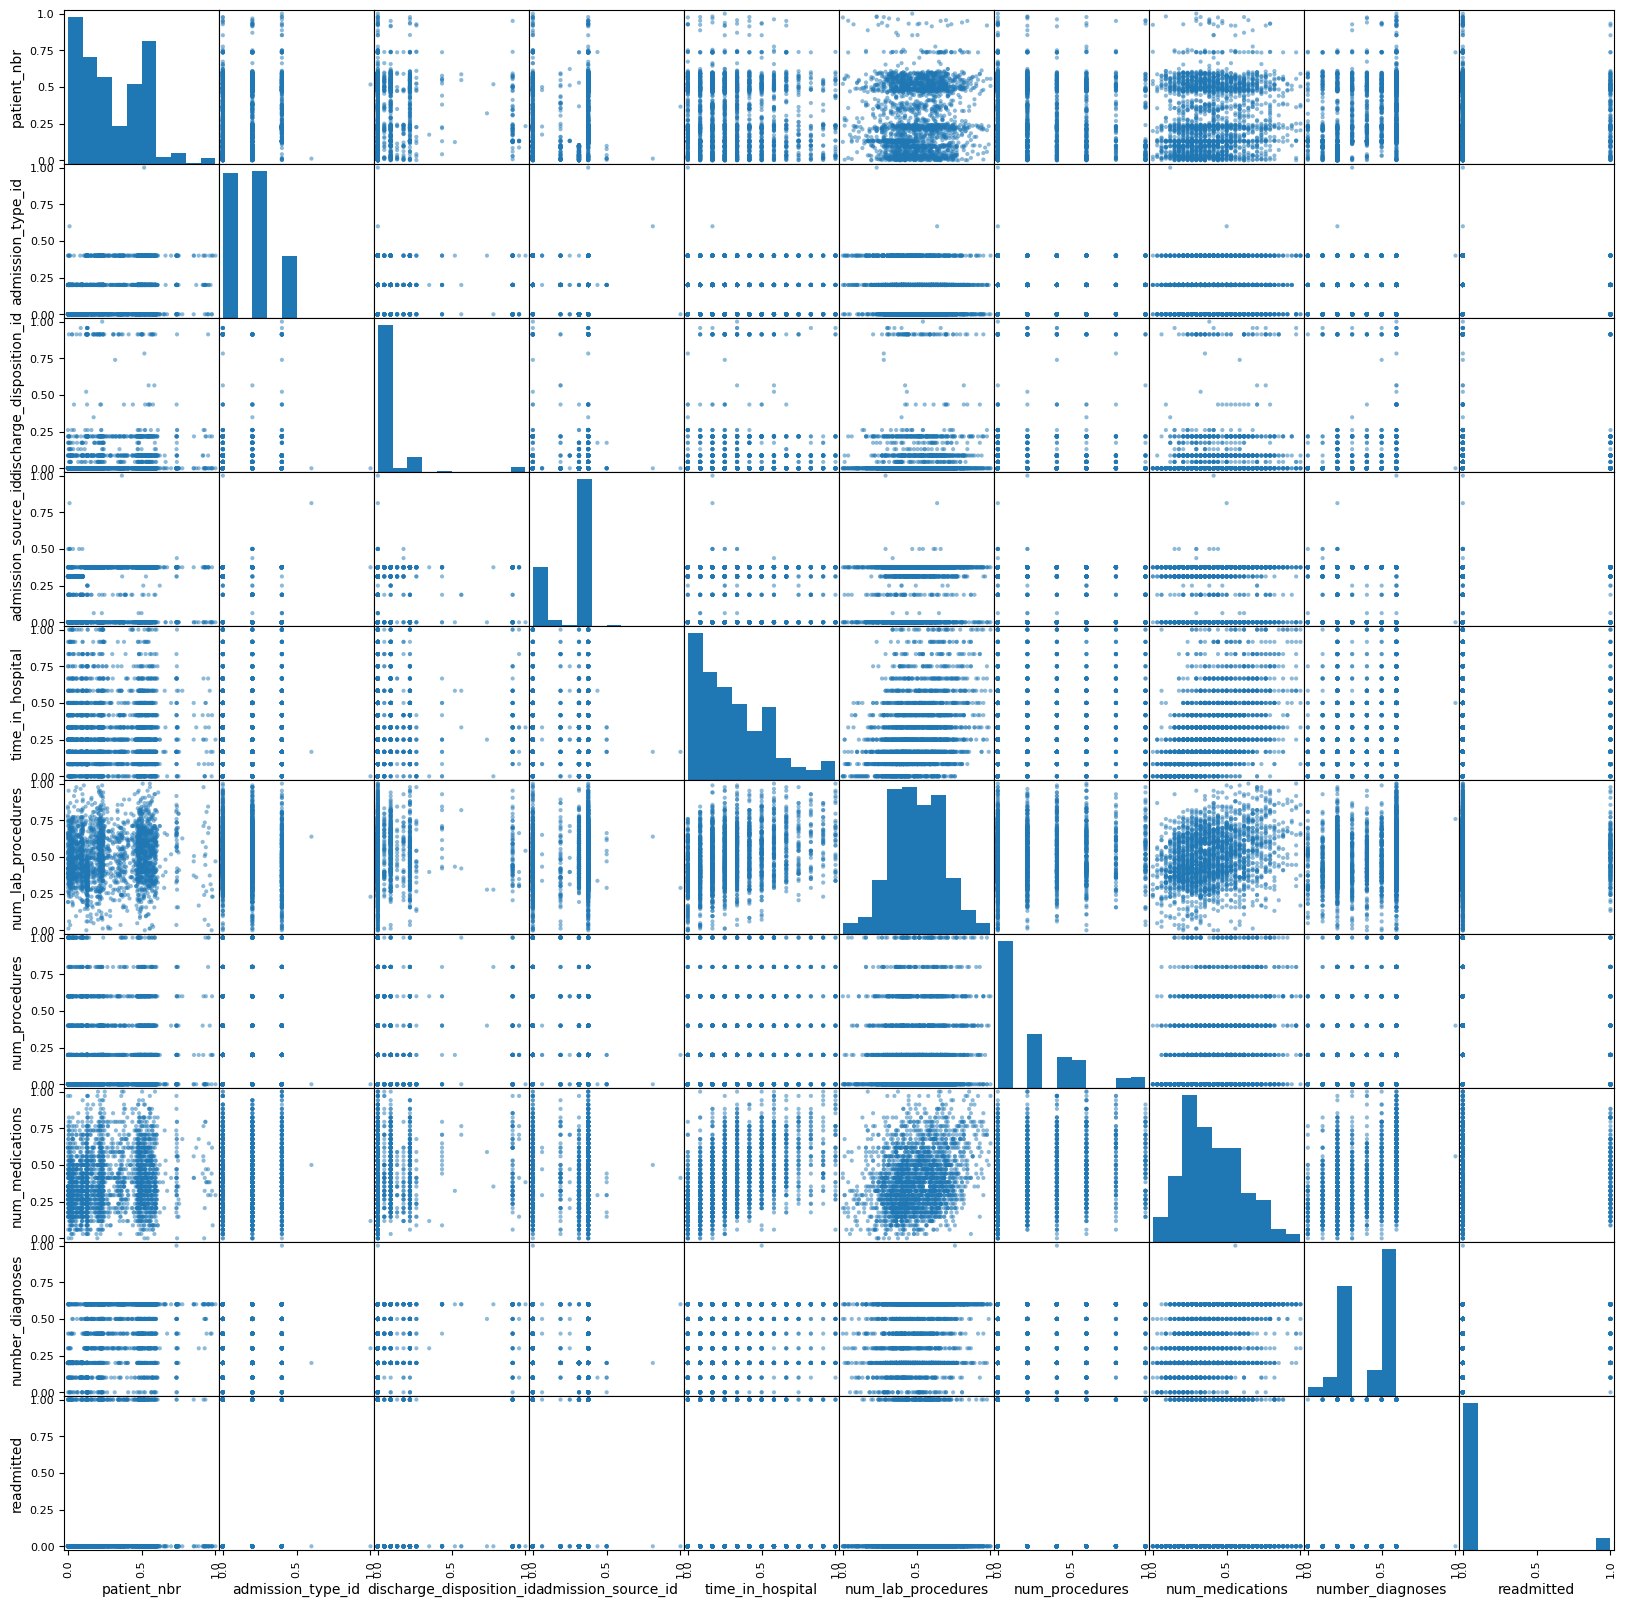

In [1459]:
pd.plotting.scatter_matrix(df_diabetic_csv, figsize=(20, 20))

### Plotting Correlation Matrix for numerical columns

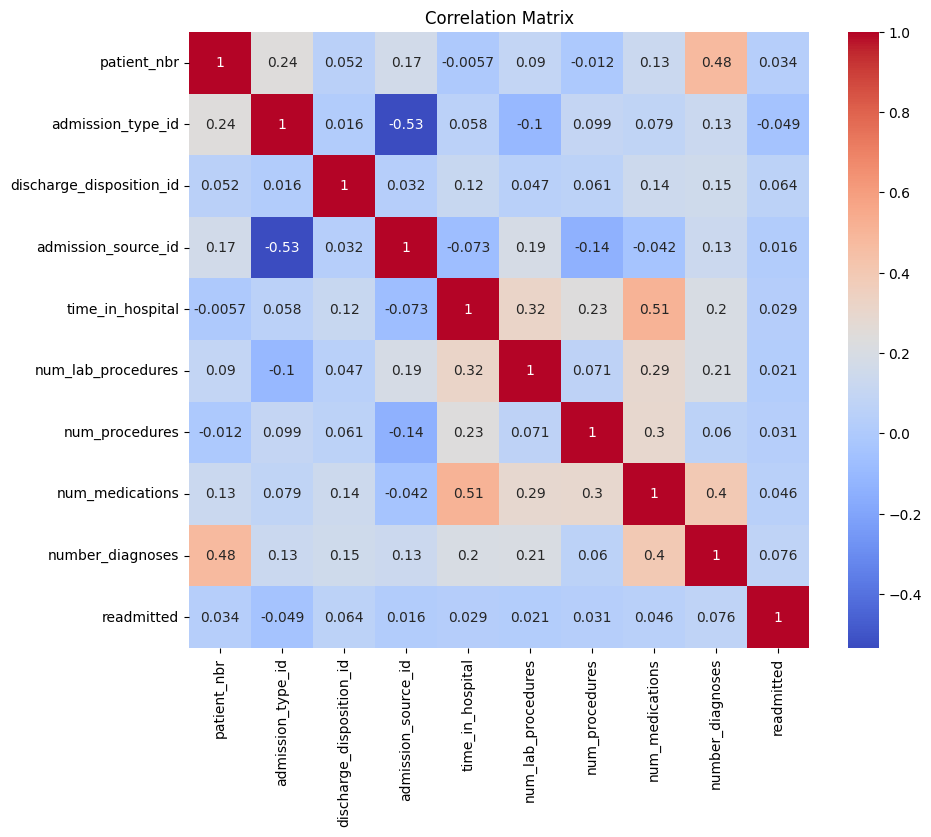

In [1460]:
corr_matrix = df_diabetic_csv[df_numerical_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###  Plotting Distribution of each numerical column against readmission

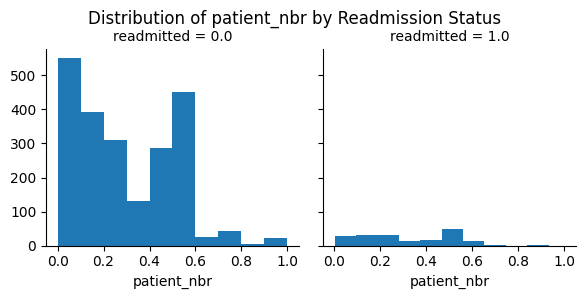

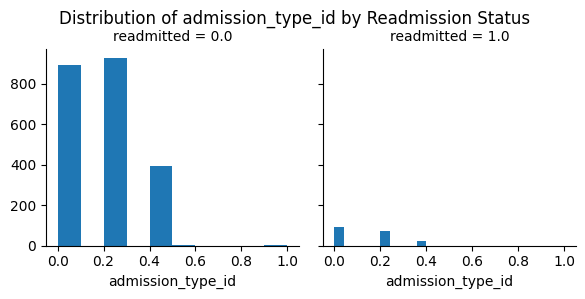

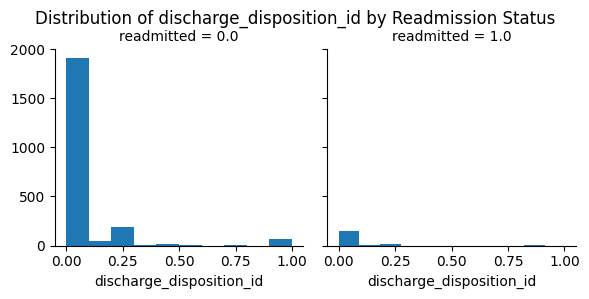

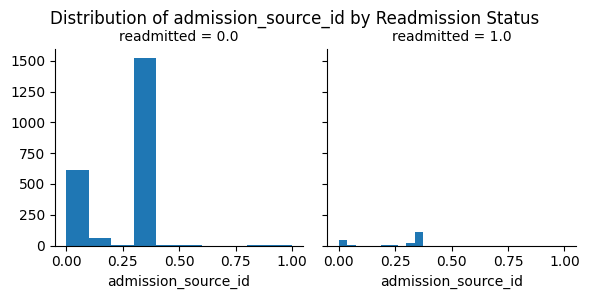

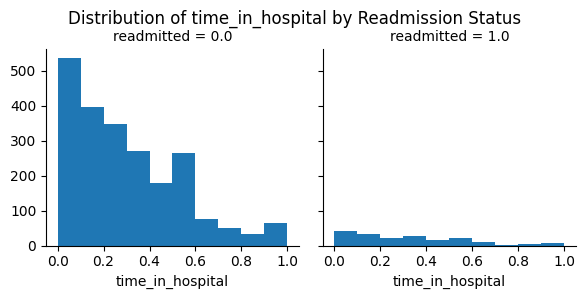

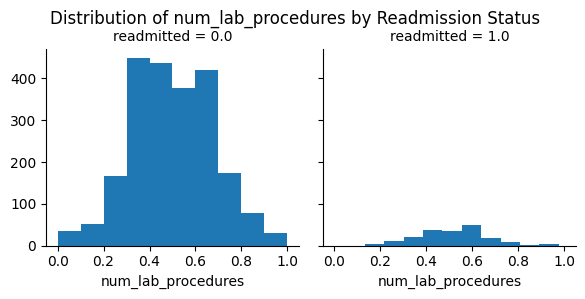

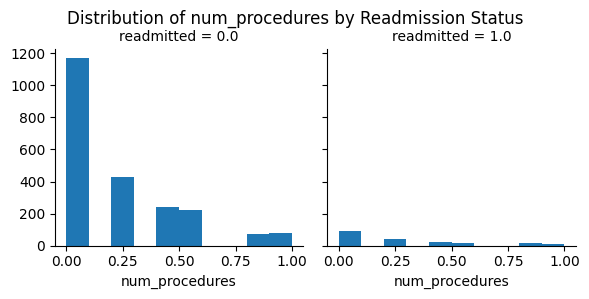

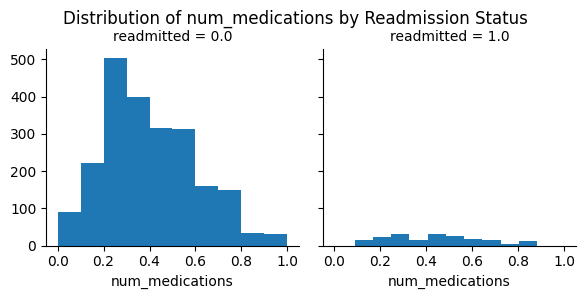

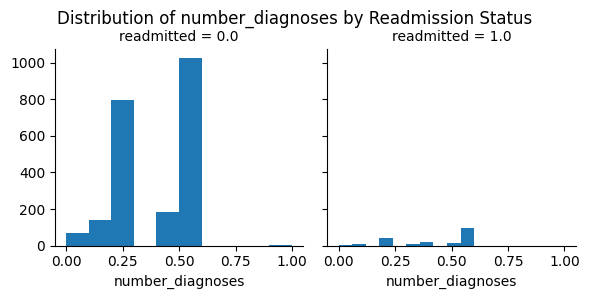

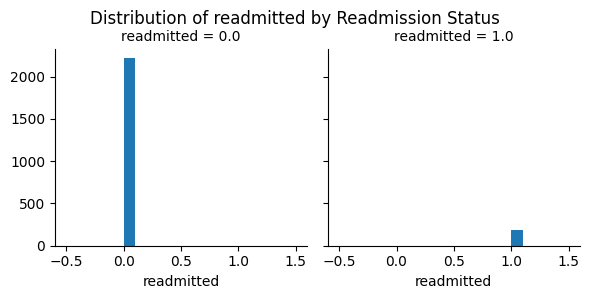

In [1461]:
for col in df_numerical_columns:
    g = sns.FacetGrid(df_diabetic_csv, col="readmitted", margin_titles=True)
    g.map(plt.hist, col)
    g.fig.suptitle(f'Distribution of {col} by Readmission Status')
    g.fig.subplots_adjust(top=0.85) 
    plt.show()

## Model Building

### Selecting the predictors that would have impact in predicting readmission

In [1462]:
df_readmitted_predictors_cols = df_numerical_columns.values.tolist()
df_readmitted_predictors_cols.remove('readmitted')
df_readmitted_predictors_cols

['patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses']

### Building Linear model

#### Feture Selection

In [1463]:
X0 = df_diabetic_csv[df_readmitted_predictors_cols]
Y0 = df_diabetic_csv['readmitted']
estimator=svm.SVR(kernel="linear")
selector=feature_selection.RFE(estimator,n_features_to_select=9, step=1)
selector=selector.fit(X0, Y0)

select_features=np.array(df_readmitted_predictors_cols)[selector.ranking_==1].tolist()
print("Selected features:\n{}".format(',\n'.join(list(select_features))))

Selected features:
patient_nbr,
admission_type_id,
discharge_disposition_id,
admission_source_id,
time_in_hospital,
num_lab_procedures,
num_procedures,
num_medications,
number_diagnoses


#### Defining X and Y for the model

In [1464]:
X=df_diabetic_csv[select_features]
Y=df_diabetic_csv['readmitted']

print(X.shape)
print(Y.shape)

X.head()

(2403, 9)
(2403,)


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
23879,0.038375,0.0,0.086957,0.3125,0.916667,0.771084,1.0,0.529412,0.2
24069,0.075508,0.0,0.000000,0.3125,1.000000,0.746988,0.4,0.441176,0.2
24117,0.002846,0.2,0.000000,0.1875,0.833333,0.361446,1.0,0.441176,0.2
24177,0.001875,0.2,0.086957,0.0000,0.916667,0.662651,0.2,0.558824,0.2
24228,0.006286,0.0,0.000000,0.3125,0.416667,0.445783,0.4,0.235294,0.2


#### Spliting the X and Y data for training and testing

In [1465]:
trainX,testX,trainY,testY = train_test_split(X, Y, test_size=0.2)

#### Training Linear Model

In [1466]:
linear_model_1=linear_model.LogisticRegression()
linear_model_1.fit(trainX,trainY)

LogisticRegression()

#### Priniting Linear model intercept and coefficent

In [1467]:
print("Linear model intercept: {}".format(linear_model_1.intercept_))
print("Linear model Coefficient: {}".format(linear_model_1.coef_))

Linear model intercept: [-3.11332666]
Linear model Coefficient: [[ 0.17341569 -1.34521779  0.76699102  0.1836179   0.04644122  0.10542888
   0.51960027  0.42517802  0.7717646 ]]


#### Predicting the Readmission

In [1468]:
predictedY = linear_model_1.predict(testX)

### Printing model scores against training and test data

In [1469]:
print("Score against training data: {}".format(linear_model_1.score(trainX, trainY)))
print("Score against test data: {}".format(linear_model_1.score(testX, testY)))

Score against training data: 0.921436004162331
Score against test data: 0.9230769230769231


#### Evaluating the model

##### Calculating the Mean hits

In [1470]:
mean_hits = np.mean(predictedY == testY)
print("Mean hits: {}".format(mean_hits))

Mean hits: 0.9230769230769231


##### Calculating the Accuracy score

In [1471]:
accuracy_score = accuracy_score(y_true=testY, y_pred=predictedY)
print("Accuracy score: {}".format(accuracy_score))

Accuracy score: 0.9230769230769231


##### Calculating the cross validation mean 

In [1472]:
scores = cross_val_score(linear_model_1, X, Y, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Cross-validation mean scores: 0.9217652143845088


### Showing the prediction probabality 

In [1473]:
pred_score = linear_model_1.predict_proba(testX)
print(pred_score)

[[0.90952282 0.09047718]
 [0.91851012 0.08148988]
 [0.95315172 0.04684828]
 [0.92989611 0.07010389]
 [0.91559409 0.08440591]
 [0.9229314  0.0770686 ]
 [0.87025248 0.12974752]
 [0.91770782 0.08229218]
 [0.95277263 0.04722737]
 [0.91341502 0.08658498]
 [0.94199353 0.05800647]
 [0.90846362 0.09153638]
 [0.94592555 0.05407445]
 [0.93439034 0.06560966]
 [0.91137866 0.08862134]
 [0.92917077 0.07082923]
 [0.9622999  0.0377001 ]
 [0.92178598 0.07821402]
 [0.93207653 0.06792347]
 [0.88934652 0.11065348]
 [0.94102274 0.05897726]
 [0.93690532 0.06309468]
 [0.90315457 0.09684543]
 [0.90848873 0.09151127]
 [0.93408413 0.06591587]
 [0.92818618 0.07181382]
 [0.92382851 0.07617149]
 [0.93160718 0.06839282]
 [0.90289367 0.09710633]
 [0.94423858 0.05576142]
 [0.89745993 0.10254007]
 [0.93294563 0.06705437]
 [0.92380834 0.07619166]
 [0.89887832 0.10112168]
 [0.92565525 0.07434475]
 [0.93145315 0.06854685]
 [0.91969212 0.08030788]
 [0.92282547 0.07717453]
 [0.91916021 0.08083979]
 [0.92384687 0.07615313]


### Calculating and Plotting precision recall curve

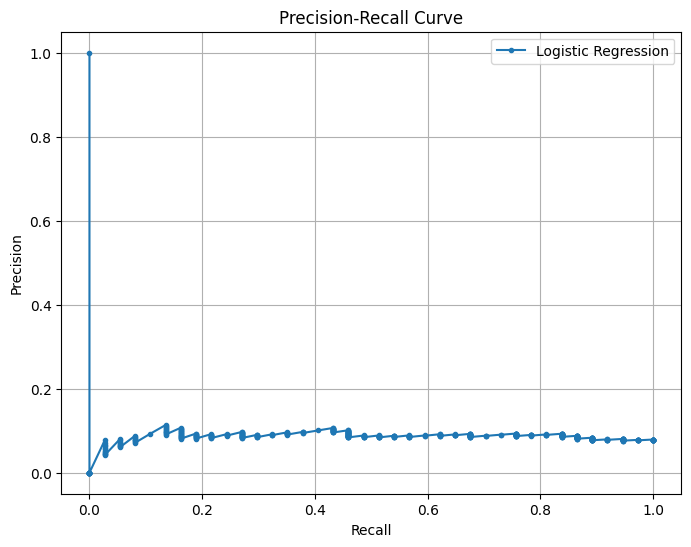

In [1474]:
p,r,t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(r, p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

### Calculating AUC and plotting ROC Curve

AUC = 0.5608108108108107


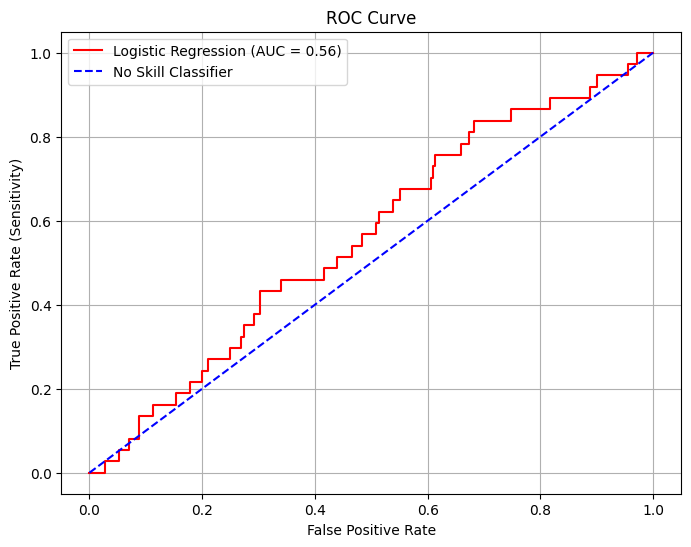

In [1475]:
prob = np.array(linear_model_1.predict_proba(testX)[:, 1]) 
testY += 1 
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(fpr, sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(fpr, sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(fpr, sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

#### Calculating the mean squared error (MSE)

In [1476]:
n = df_diabetic_csv.shape[0]
df_diabetic_csv['predicted'] = linear_model_1.predict(X)
mse = sum((df_diabetic_csv['predicted'] - df_diabetic_csv['readmitted']) ** 2) / n

print("Mean Squared error: {}".format(mse))

Mean Squared error: 0.07823553890969621


# Part 2

## Improved Model

### Showing shape and info of dataframe

In [1477]:
print(df_diabetic_csv_part2.shape)
df_diabetic_csv_part2.info()

(101766, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      99493 non-null   object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    3197 non-null    object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                61510 non-null   object
 10  medical_specialty         51817 non-null   object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int

### Identifing the missing values in dataframe before imputation

In [1478]:
mis_val_before_imp = df_diabetic_csv_part2.isnull().sum()
print(mis_val_before_imp)

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Listing ID columns, Categorical columns and numerical columns  according to glossary

In [1479]:
df_id_var = ['patient_nbr','encounter_id']
df_num_vars = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

df_cols = df_diabetic_csv_part2.columns.values.tolist()
df_cat_vars = [i for i in df_cols if i not in df_id_var + df_num_vars]
df_cat_vars

['race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

### Applying imputation on Category data and changing the dtype accordingly

In [1480]:
for imput_cat_col in df_cat_vars:
    if(df_diabetic_csv_part2[imput_cat_col].isnull().sum() !=0):
        df_diabetic_csv_part2[imput_cat_col] = df_diabetic_csv_part2[imput_cat_col].fillna(df_diabetic_csv_part2[imput_cat_col].mode().iloc[0])
        df_diabetic_csv_part2[imput_cat_col] = df_diabetic_csv_part2[imput_cat_col].astype('category')

### Applying imputation on Numerical data

In [1481]:
for imput_num_col in df_num_vars:
    if(df_diabetic_csv_part2[imput_num_col].isnull().sum() !=0):
        df_diabetic_csv_part2[imput_num_col] = df_diabetic_csv_part2[imput_num_col].fillna(df_diabetic_csv_part2[imput_num_col].median())
        # df_diabetic_csv_part2[imput_num_col] = df_diabetic_csv_part2[imput_num_col].fillna(df_diabetic_csv_part2[imput_num_col].mean())

### Identifing the missing values in dataframe after imputation

In [1482]:
mis_val_after_imp = df_diabetic_csv_part2.isnull().sum()
print(mis_val_after_imp)
print(df_diabetic_csv_part2.shape)
df_diabetic_csv_part2.describe()

patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.111599
std,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.314874
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000
max,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


### Identifying and removing outliers for the imputed dataframe

In [1483]:
for q_col in df_num_vars:
    # Calculate summary statistics
    Q1 = np.percentile(df_diabetic_csv_part2[q_col], 25)
    Q3 = np.percentile(df_diabetic_csv_part2[q_col], 75)
    IQR = Q3 - Q1

    # Define threshold for outliers
    upper_Q = Q3+1.5*IQR
    lower_Q = Q1-1.5*IQR

    # Filter out outliers for the current column
    df_diabetic_csv_part2 = df_diabetic_csv_part2 [(df_diabetic_csv_part2[q_col]>=lower_Q) & (df_diabetic_csv_part2[q_col]<=upper_Q)]
    
    # Print summary statistics
    print(q_col,Q1,Q3,IQR,upper_Q,lower_Q)
    
df_diabetic_csv.shape

time_in_hospital 2.0 6.0 4.0 12.0 -4.0
num_lab_procedures 31.0 57.0 26.0 96.0 -8.0
num_procedures 0.0 2.0 2.0 5.0 -3.0
num_medications 10.0 19.0 9.0 32.5 -3.5
number_outpatient 0.0 0.0 0.0 0.0 0.0
number_emergency 0.0 0.0 0.0 0.0 0.0
number_inpatient 0.0 1.0 1.0 2.5 -1.5
number_diagnoses 6.0 9.0 3.0 13.5 1.5


(2403, 28)

### Summary of the dataframe after outliers are removed from imputed dataframe

In [1484]:
df_diabetic_csv_part2.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,6.659200e+04,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.0,66592.0,66592.000000,66592.000000,66592.000000
mean,5.116463e+07,1.974096,3.688701,5.652015,4.061959,42.384821,1.082517,14.420921,0.0,0.0,0.313446,7.210986,0.095642
std,3.994087e+07,1.421122,5.393101,3.839094,2.598669,19.162378,1.369742,6.361797,0.0,0.0,0.584940,1.971892,0.294102
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,2.000000,0.000000
25%,1.865428e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.0,0.0,0.000000,6.000000,0.000000
50%,4.264448e+07,1.000000,1.000000,7.000000,3.000000,44.000000,1.000000,14.000000,0.0,0.0,0.000000,8.000000,0.000000
75%,8.545381e+07,3.000000,3.000000,7.000000,5.000000,56.000000,2.000000,18.000000,0.0,0.0,0.000000,9.000000,0.000000
max,1.895026e+08,8.000000,28.000000,25.000000,12.000000,96.000000,5.000000,32.000000,0.0,0.0,2.000000,13.000000,1.000000


### Remove columns with zero values by observing the summary

In [1485]:
outlier_zero_columns = ['number_outpatient','number_emergency']
df_diabetic_csv_part2.drop(outlier_zero_columns, axis=1, inplace=True)
df_num_vars.remove('number_outpatient')
df_num_vars.remove('number_emergency')


### Feature normalisation 

In [1486]:
df_norm = df_diabetic_csv_part2[df_num_vars]

# Normalizing the numerical columns using min-max scaling
data_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())

# Replacing the original dataframe's numerical columns with normalized values
df_diabetic_csv_part2[df_num_vars] = data_norm

df_numerical_part2 = df_diabetic_csv_part2.select_dtypes(include=['int64', 'float64'])



# Generating descriptive statistics for the normalized numerical columns in dataframe
df_numerical_part2.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,readmitted
count,6.659200e+04,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000,66592.000000
mean,5.116463e+07,1.974096,3.688701,5.652015,0.278360,0.435630,0.216503,0.432933,0.156723,0.473726,0.095642
std,3.994087e+07,1.421122,5.393101,3.839094,0.236243,0.201709,0.273948,0.205219,0.292470,0.179263,0.294102
min,1.350000e+02,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.865428e+07,1.000000,1.000000,1.000000,0.090909,0.315789,0.000000,0.290323,0.000000,0.363636,0.000000
50%,4.264448e+07,1.000000,1.000000,7.000000,0.181818,0.452632,0.200000,0.419355,0.000000,0.545455,0.000000
75%,8.545381e+07,3.000000,3.000000,7.000000,0.363636,0.578947,0.400000,0.548387,0.000000,0.636364,0.000000
max,1.895026e+08,8.000000,28.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Showing the shape of the final dataframe 

In [1487]:
df_diabetic_csv_part2.shape

(66592, 47)

### Determining the optimal number of clusters using elbow method


Plotting elbow method...
2 2.827498028350887e+19
4 8.357736199784096e+18
6 3.79671471313857e+18
8 1.6503817198954634e+18
10 1.0862869112259295e+18
12 7.841207095234519e+17
14 6.464964187758456e+17
16 4.5668921218211546e+17
18 3.9194013083780864e+17


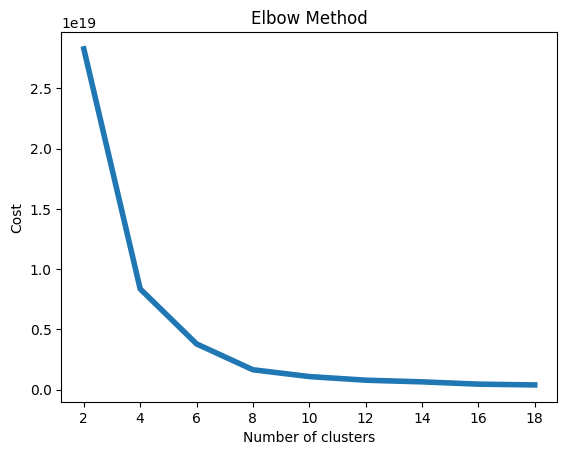

DONE


In [1488]:
def elbow(elbow_data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 20, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(elbow_data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.title("Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
    print("DONE")

elbow(df_numerical_part2)

### Kmeans Clusting

In [1489]:
kmeans = KMeans(n_clusters=6,init='random',max_iter=100,random_state=10)
kmeans.fit(df_numerical_part2)
labels = kmeans.labels_

### Defining labels of kmeans

In [1490]:
df_numerical_part2['Cluster'] = labels
print(df_numerical_part2["Cluster"].unique())
df_numerical_part2.head()

[3 1 5 0 4 2]


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,readmitted,Cluster
1,55629189,1,1,7,0.181818,0.610526,0.0,0.548387,0.0,0.636364,0,3
3,82442376,1,1,7,0.090909,0.452632,0.2,0.483871,0.0,0.454545,0,1
4,42519267,1,1,7,0.000000,0.526316,0.0,0.225806,0.0,0.272727,0,5
6,84259809,3,1,2,0.272727,0.726316,0.2,0.645161,0.0,0.454545,0,1
7,114882984,1,1,7,0.363636,0.757895,0.0,0.354839,0.0,0.545455,0,1


### Defining centroids of kmeans

In [1491]:
centroids = kmeans.cluster_centers_
print(centroids.shape)
print ('centroids', centroids)

(6, 11)
centroids [[2.30551972e+07 2.21002931e+00 4.20921524e+00 6.80462390e+00
  2.75717119e-01 3.95388096e-01 2.27108434e-01 4.43393452e-01
  1.28907522e-01 4.23055860e-01 8.34418756e-02]
 [9.70925740e+07 2.04939182e+00 2.92566654e+00 5.68294631e+00
  2.84650784e-01 4.43132804e-01 2.13244870e-01 4.38381112e-01
  1.70629070e-01 5.16748763e-01 9.91522300e-02]
 [1.53766076e+08 1.61835529e+00 2.96001817e+00 5.32485234e+00
  2.50216844e-01 3.97618307e-01 2.14811449e-01 4.45603904e-01
  6.04270786e-02 5.41035067e-01 7.76919582e-02]
 [6.64004932e+07 2.02705660e+00 3.05858948e+00 5.59972148e+00
  2.74490654e-01 4.46365840e-01 2.15199443e-01 4.43988795e-01
  1.55227295e-01 5.13767939e-01 9.53944096e-02]
 [4.08357358e+06 1.77838323e+00 5.14367499e+00 5.13470824e+00
  2.90021194e-01 4.75352680e-01 2.36032556e-01 3.95353753e-01
  1.69402676e-01 4.12263761e-01 9.56683681e-02]
 [4.24104797e+07 1.88224863e+00 3.05657031e+00 5.12741621e+00
  2.66109400e-01 4.15415201e-01 1.86043625e-01 4.49656482e-0

### Ploting the cluster frequency in the dataframe

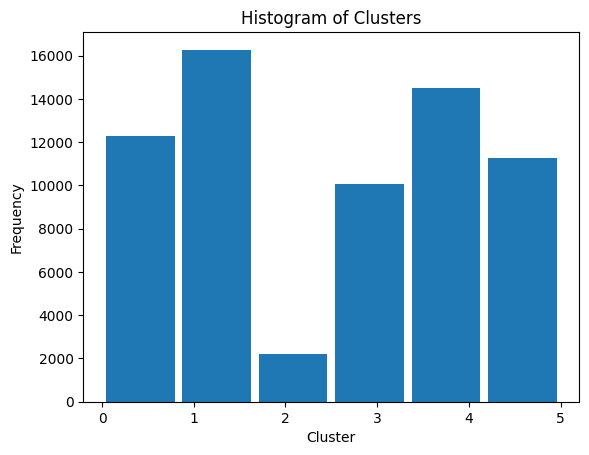

In [1492]:
## histogram of the clusters
plt.hist(df_numerical_part2['Cluster'],bins=6,rwidth=0.9)
plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

### Ploting the kmeans clusters in the dataframe

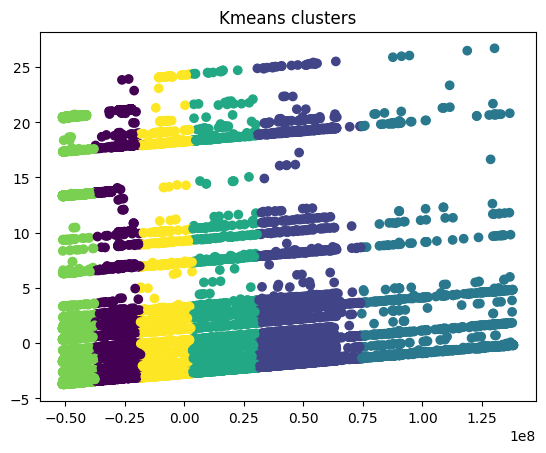

In [1493]:
pca_data = PCA(n_components=2).fit(df_numerical_part2)
pca_2d = pca_data.transform(df_numerical_part2)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels)
plt.title('Kmeans clusters')
plt.show()

### Re-importing all the libraries and handeling ConvergenceWarning 

In [1494]:
import pandas as pd                 #import pandas with the alias pd
import numpy as np                  #import numpy with the alias np
import matplotlib.pyplot as plt     #impot matplotlib.pyplot with the alias plt
import seaborn as sns               #import seaborn with the alias sns
from sklearn.model_selection import train_test_split        #import train_test_split from sklearn.model_selection
from sklearn import svm, feature_selection, linear_model, metrics       #import svm, feature_selection, linear_model, metrics from sklearn
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve       #import accuracy_score, precision_recall_curve, roc_curve from sklearn.metrics
from sklearn.model_selection import cross_val_score     #import cross_val_score from sklearn.model_selection
from sklearn.cluster import KMeans      #import KMeans from sklearn.cluster
from sklearn.decomposition import PCA       #import PCA from sklearn.decomposition
import warnings    #import warnings
from sklearn.exceptions import ConvergenceWarning       #import ConvergenceWarning from sklearn.exceptions

# Suppress convergence warnings
warnings.simplefilter('ignore', ConvergenceWarning)

### Model training for cluster 0 and evaluating the model

(12293, 12)
(12293, 11)
(12293,)
Score against training data: 0.9173276388041489
Score against test data: 0.9145994306628711
Mean hits: 0.9145994306628711
Accuracy score: 0.9145994306628711
Cross-validation mean scores: 0.9167820357617735


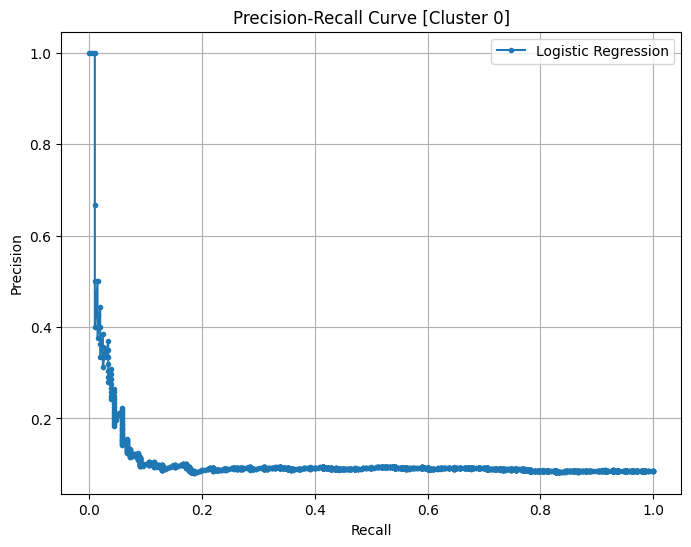

AUC = 0.5203593131338796


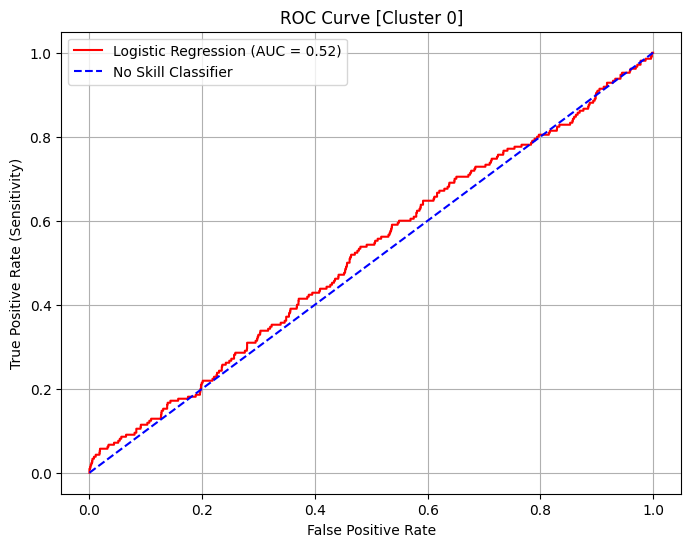

In [1495]:
kmeans_cluster_0 = df_numerical_part2[df_numerical_part2['Cluster']==0]
print(kmeans_cluster_0.shape)

select_features = kmeans_cluster_0.columns.values.tolist()
select_features.remove('readmitted')
X_cl0=kmeans_cluster_0[select_features]
Y_cl0=kmeans_cluster_0['readmitted']

print(X_cl0.shape)
print(Y_cl0.shape)

Cl0_trainX,cl0_testX,cl0_trainY,cl0_testY = train_test_split(X_cl0,Y_cl0,test_size=0.2)

linear_model_cl0 = linear_model.LogisticRegression() 
linear_model_cl0.fit(Cl0_trainX,cl0_trainY)

Y_cl0_predicted = linear_model_cl0.predict(cl0_testX)

print("Score against training data: {}".format(linear_model_cl0.score(Cl0_trainX, cl0_trainY)))
print("Score against test data: {}".format(linear_model_cl0.score(cl0_testX, cl0_testY)))

c10_mean_hits = np.mean(Y_cl0_predicted == cl0_testY)
print("Mean hits: {}".format(c10_mean_hits))

c10_accuracy_score = accuracy_score(y_true=cl0_testY, y_pred=Y_cl0_predicted)
print("Accuracy score: {}".format(c10_accuracy_score))

c10_scores = cross_val_score(linear_model_cl0, X_cl0, Y_cl0, scoring='accuracy', cv=10)
c10_cross_val_mean_scores = c10_scores.mean()
print("Cross-validation mean scores: {}".format(c10_cross_val_mean_scores))

c10_pred_score = linear_model_cl0.predict_proba(cl0_testX)

c10_p,c10_r,c10_t = precision_recall_curve(y_true=cl0_testY, probas_pred=c10_pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(c10_r, c10_p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve [Cluster 0]')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

c10_prob = np.array(linear_model_cl0.predict_proba(cl0_testX)[:, 1]) 
cl0_testY += 1 
c10_fpr, c10_sensitivity, _ = metrics.roc_curve(cl0_testY, c10_prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(c10_fpr, c10_sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(c10_fpr, c10_sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(c10_fpr, c10_sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve [Cluster 0]')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


### Model training for cluster 1 and evaluating the model

(16271, 12)
(16271, 11)
(16271,)
Score against training data: 0.9013521819299324
Score against test data: 0.8986175115207373
Mean hits: 0.8986175115207373
Accuracy score: 0.8986175115207373
Cross-validation mean scores: 0.9008051326736022


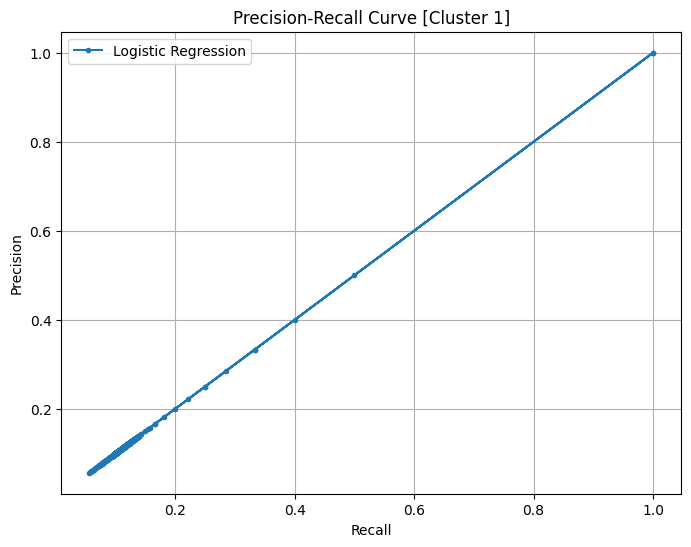

AUC = 0.503957005957006


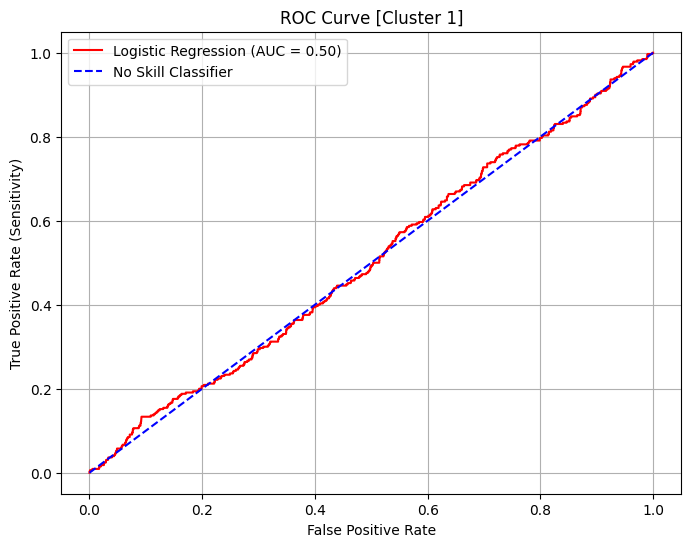

In [1496]:
kmeans_cluster_1 = df_numerical_part2[df_numerical_part2['Cluster']==1]
print(kmeans_cluster_1.shape)

select_features = kmeans_cluster_1.columns.values.tolist()
select_features.remove('readmitted')
X_cl1=kmeans_cluster_1[select_features]
Y_cl1=kmeans_cluster_1['readmitted']

print(X_cl1.shape)
print(Y_cl1.shape)

Cl1_trainX,cl1_testX,cl1_trainY,cl1_testY = train_test_split(X_cl1,Y_cl1,test_size=0.2)

linear_model_cl1 = linear_model.LogisticRegression() 
linear_model_cl1.fit(Cl1_trainX,cl1_trainY)

Y_cl1_predicted = linear_model_cl1.predict(cl1_testX)

print("Score against training data: {}".format(linear_model_cl1.score(Cl1_trainX, cl1_trainY)))
print("Score against test data: {}".format(linear_model_cl1.score(cl1_testX, cl1_testY)))

c11_mean_hits = np.mean(Y_cl1_predicted == cl1_testY)
print("Mean hits: {}".format(c11_mean_hits))

cl1_accuracy_score = accuracy_score(y_true=cl1_testY, y_pred=Y_cl1_predicted)
print("Accuracy score: {}".format(cl1_accuracy_score))

c11_scores = cross_val_score(linear_model_cl1, X_cl1, Y_cl1, scoring='accuracy', cv=10)
c11_cross_val_mean_scores = c11_scores.mean()
print("Cross-validation mean scores: {}".format(c11_cross_val_mean_scores))

c11_pred_score = linear_model_cl1.predict_proba(cl1_testX)

c11_p,c11_r,c11_t = precision_recall_curve(y_true=cl1_testY, probas_pred=c11_pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(c11_p, c11_p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve [Cluster 1]')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

c11_prob = np.array(linear_model_cl1.predict_proba(cl1_testX)[:, 1]) 
cl1_testY += 1 
c11_fpr, c11_sensitivity, _ = metrics.roc_curve(cl1_testY, c11_prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(c11_fpr, c11_sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(c11_fpr, c11_sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(c11_fpr, c11_sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve [Cluster 1]')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


### Model training for cluster 2 and evaluating the model


(2198, 12)
(2198, 11)
(2198,)
Score against training data: 0.9209328782707622
Score against test data: 0.9295454545454546
Mean hits: 0.9295454545454546
Accuracy score: 0.9295454545454546
Cross-validation mean scores: 0.9226567040265671


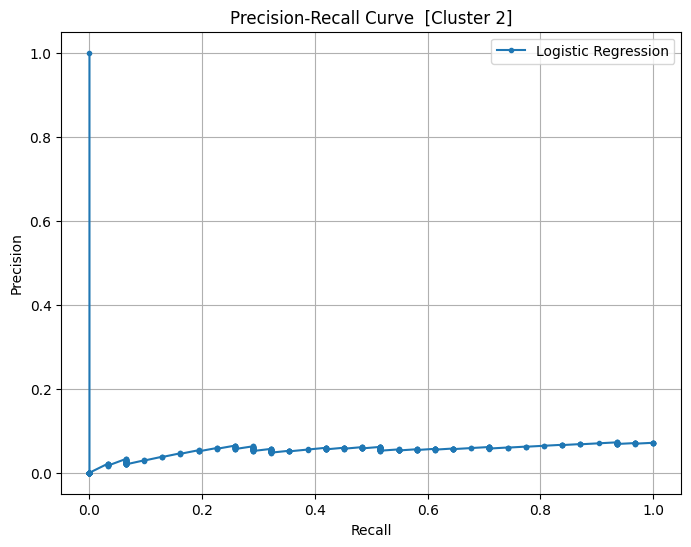

AUC = 0.3991245366353814


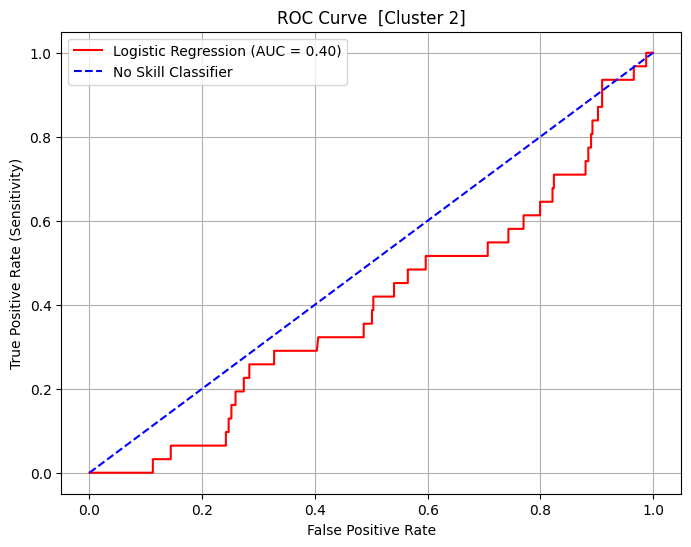

In [1497]:
kmeans_cluster_2 = df_numerical_part2[df_numerical_part2['Cluster']==2]
print(kmeans_cluster_2.shape)

select_features = kmeans_cluster_2.columns.values.tolist()
select_features.remove('readmitted')
X_cl2=kmeans_cluster_2[select_features]
Y_cl2=kmeans_cluster_2['readmitted']

print(X_cl2.shape)
print(Y_cl2.shape)

Cl2_trainX,cl2_testX,cl2_trainY,cl2_testY = train_test_split(X_cl2,Y_cl2,test_size=0.2)

linear_model_cl2 = linear_model.LogisticRegression() 
linear_model_cl2.fit(Cl2_trainX,cl2_trainY)

Y_cl2_predicted = linear_model_cl2.predict(cl2_testX)

print("Score against training data: {}".format(linear_model_cl2.score(Cl2_trainX, cl2_trainY)))
print("Score against test data: {}".format(linear_model_cl2.score(cl2_testX, cl2_testY)))

c12_mean_hits = np.mean(Y_cl2_predicted == cl2_testY)
print("Mean hits: {}".format(c12_mean_hits))

cl2_accuracy_score = accuracy_score(y_true=cl2_testY, y_pred=Y_cl2_predicted)
print("Accuracy score: {}".format(cl2_accuracy_score))

c12_scores = cross_val_score(linear_model_cl2, X_cl2, Y_cl2, scoring='accuracy', cv=10)
c12_cross_val_mean_scores = c12_scores.mean()
print("Cross-validation mean scores: {}".format(c12_cross_val_mean_scores))

c12_pred_score = linear_model_cl2.predict_proba(cl2_testX)

c12_p,c12_r,c12_t = precision_recall_curve(y_true=cl2_testY, probas_pred=c12_pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(c12_r, c12_p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve  [Cluster 2]')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

c12_prob = np.array(linear_model_cl2.predict_proba(cl2_testX)[:, 1]) 
cl2_testY += 1 
c12_fpr, c12_sensitivity, _ = metrics.roc_curve(cl2_testY, c12_prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(c12_fpr, c12_sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(c12_fpr, c12_sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(c12_fpr, c12_sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve  [Cluster 2]')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


### Model training for cluster 3 and evaluating the model

(10048, 12)
(10048, 11)
(10048,)
Score against training data: 0.9024632993281911
Score against test data: 0.9134328358208955
Mean hits: 0.9134328358208955
Accuracy score: 0.9134328358208955
Cross-validation mean scores: 0.9046577867633943


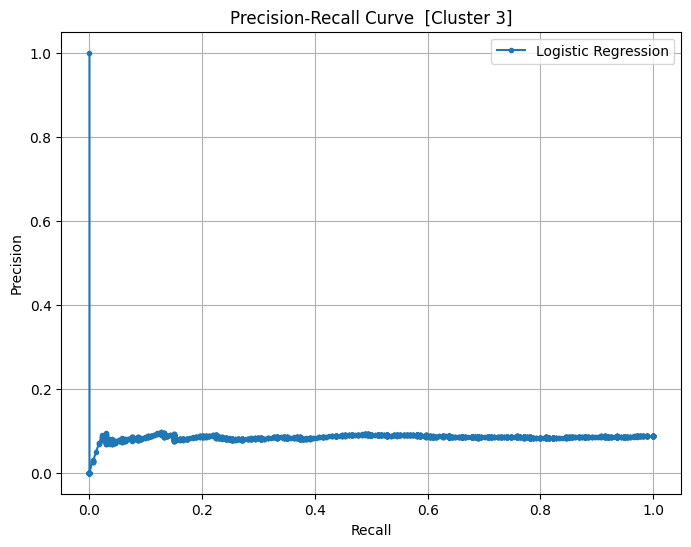

AUC = 0.4925797585956477


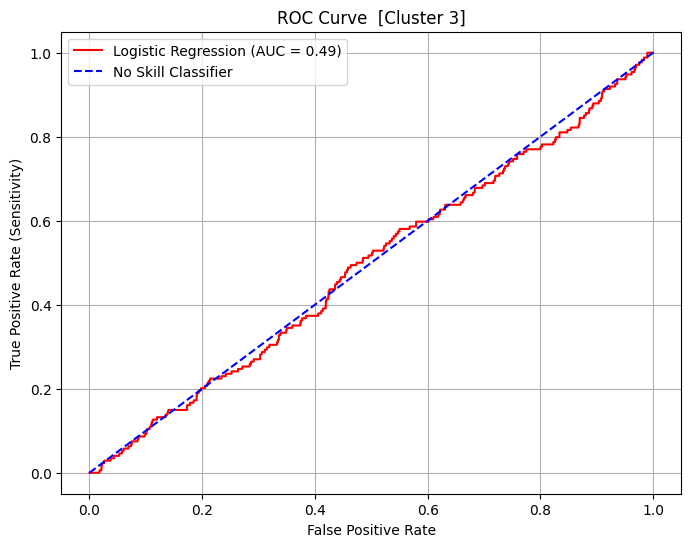

In [1498]:
kmeans_cluster_3 = df_numerical_part2[df_numerical_part2['Cluster']==3]
print(kmeans_cluster_3.shape)

select_features = kmeans_cluster_3.columns.values.tolist()
select_features.remove('readmitted')
X_cl3=kmeans_cluster_3[select_features]
Y_cl3=kmeans_cluster_3['readmitted']

print(X_cl3.shape)
print(Y_cl3.shape)

Cl3_trainX,cl3_testX,cl3_trainY,cl3_testY = train_test_split(X_cl3,Y_cl3,test_size=0.2)

linear_model_cl3 = linear_model.LogisticRegression() 
linear_model_cl3.fit(Cl3_trainX,cl3_trainY)

Y_cl3_predicted = linear_model_cl3.predict(cl3_testX)

print("Score against training data: {}".format(linear_model_cl3.score(Cl3_trainX, cl3_trainY)))
print("Score against test data: {}".format(linear_model_cl3.score(cl3_testX, cl3_testY)))

c13_mean_hits = np.mean(Y_cl3_predicted == cl3_testY)
print("Mean hits: {}".format(c13_mean_hits))

cl3_accuracy_score = accuracy_score(y_true=cl3_testY, y_pred=Y_cl3_predicted)
print("Accuracy score: {}".format(cl3_accuracy_score))

c13_scores = cross_val_score(linear_model_cl3, X_cl3, Y_cl3, scoring='accuracy', cv=10)
c13_cross_val_mean_scores = c13_scores.mean()
print("Cross-validation mean scores: {}".format(c13_cross_val_mean_scores))

c13_pred_score = linear_model_cl3.predict_proba(cl3_testX)

c13_p,c13_r,c13_t = precision_recall_curve(y_true=cl3_testY, probas_pred=c13_pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(c13_r, c13_p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve  [Cluster 3]')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

c13_prob = np.array(linear_model_cl3.predict_proba(cl3_testX)[:, 1]) 
cl3_testY += 1 
c13_fpr, c13_sensitivity, _ = metrics.roc_curve(cl3_testY, c13_prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(c13_fpr, c13_sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(c13_fpr, c13_sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(c13_fpr, c13_sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve  [Cluster 3]')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


(14500, 12)
(14500, 11)
(14500,)
Score against training data: 0.9024137931034483
Score against test data: 0.9113793103448276
Mean hits: 0.9113793103448276
Accuracy score: 0.9113793103448276
Cross-validation mean scores: 0.9042068965517241


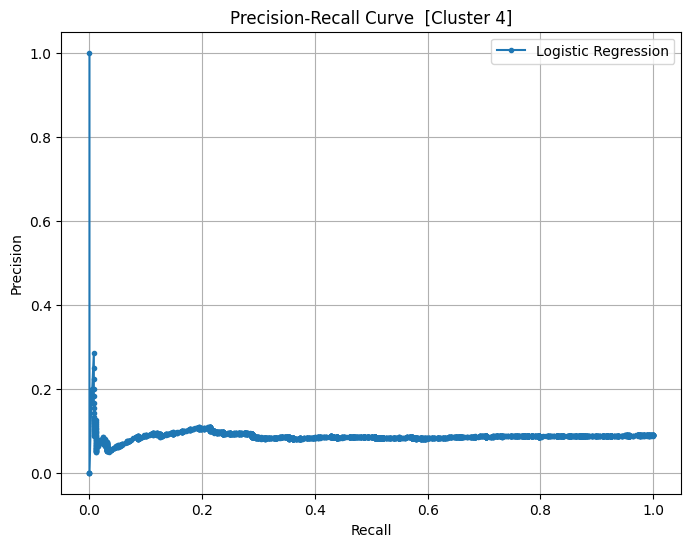

AUC = 0.4862767960591887


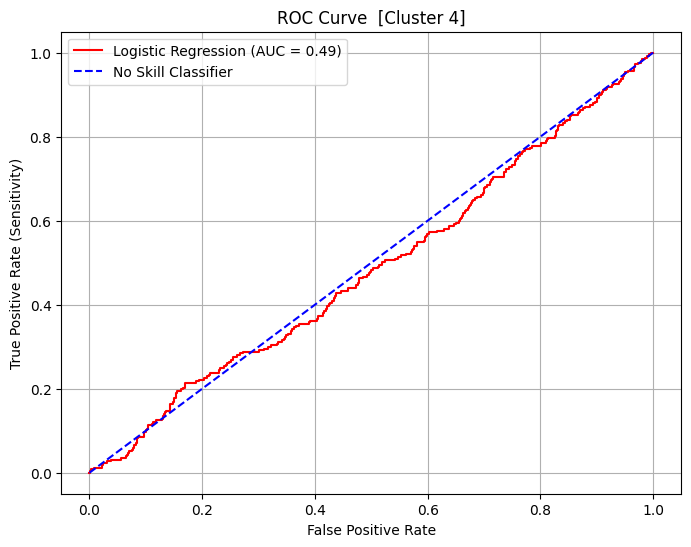

In [1499]:
kmeans_cluster_4 = df_numerical_part2[df_numerical_part2['Cluster']==4]
print(kmeans_cluster_4.shape)

select_features = kmeans_cluster_4.columns.values.tolist()
select_features.remove('readmitted')
X_cl4=kmeans_cluster_4[select_features]
Y_cl4=kmeans_cluster_4['readmitted']

print(X_cl4.shape)
print(Y_cl4.shape)

Cl4_trainX,cl4_testX,cl4_trainY,cl4_testY = train_test_split(X_cl4,Y_cl4,test_size=0.2)

linear_model_cl4 = linear_model.LogisticRegression() 
linear_model_cl4.fit(Cl4_trainX,cl4_trainY)

Y_cl4_predicted = linear_model_cl4.predict(cl4_testX)

print("Score against training data: {}".format(linear_model_cl4.score(Cl4_trainX, cl4_trainY)))
print("Score against test data: {}".format(linear_model_cl4.score(cl4_testX, cl4_testY)))

c14_mean_hits = np.mean(Y_cl4_predicted == cl4_testY)
print("Mean hits: {}".format(c14_mean_hits))

cl4_accuracy_score = accuracy_score(y_true=cl4_testY, y_pred=Y_cl4_predicted)
print("Accuracy score: {}".format(cl4_accuracy_score))

c14_scores = cross_val_score(linear_model_cl4, X_cl4, Y_cl4, scoring='accuracy', cv=10)
c14_cross_val_mean_scores = c14_scores.mean()
print("Cross-validation mean scores: {}".format(c14_cross_val_mean_scores))

c14_pred_score = linear_model_cl4.predict_proba(cl4_testX)

c14_p,c14_r,c14_t = precision_recall_curve(y_true=cl4_testY, probas_pred=c14_pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(c14_r, c14_p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve  [Cluster 4]')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

c14_prob = np.array(linear_model_cl4.predict_proba(cl4_testX)[:, 1]) 
cl4_testY += 1 
c14_fpr, c14_sensitivity, _ = metrics.roc_curve(cl4_testY, c14_prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(c14_fpr, c14_sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(c14_fpr, c14_sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(c14_fpr, c14_sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve  [Cluster 4]')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


(11282, 12)
(11282, 11)
(11282,)
Score against training data: 0.8927423822714682
Score against test data: 0.8905626938413823
Mean hits: 0.8905626938413823
Accuracy score: 0.8905626938413823
Cross-validation mean scores: 0.8923063936578532


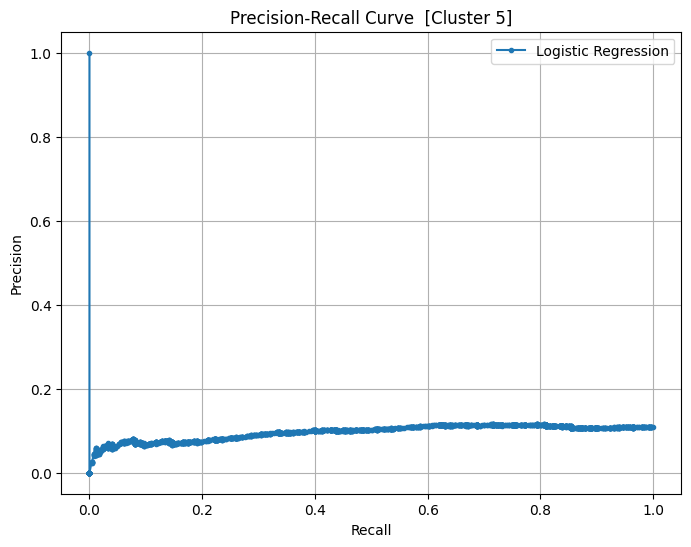

AUC = 0.47106874534211535


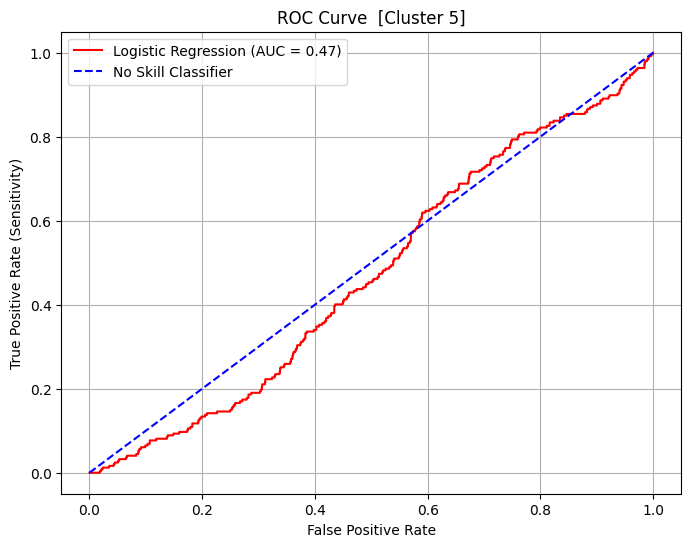

In [1500]:
kmeans_cluster_5 = df_numerical_part2[df_numerical_part2['Cluster']==5]
print(kmeans_cluster_5.shape)

select_features = kmeans_cluster_5.columns.values.tolist()
select_features.remove('readmitted')
X_cl5=kmeans_cluster_5[select_features]
Y_cl5=kmeans_cluster_5['readmitted']

print(X_cl5.shape)
print(Y_cl5.shape)

Cl5_trainX,cl5_testX,cl5_trainY,cl5_testY = train_test_split(X_cl5,Y_cl5,test_size=0.2)

linear_model_cl5 = linear_model.LogisticRegression() 
linear_model_cl5.fit(Cl5_trainX,cl5_trainY)

Y_cl5_predicted = linear_model_cl5.predict(cl5_testX)

print("Score against training data: {}".format(linear_model_cl5.score(Cl5_trainX, cl5_trainY)))
print("Score against test data: {}".format(linear_model_cl5.score(cl5_testX, cl5_testY)))

c15_mean_hits = np.mean(Y_cl5_predicted == cl5_testY)
print("Mean hits: {}".format(c15_mean_hits))

cl5_accuracy_score = accuracy_score(y_true=cl5_testY, y_pred=Y_cl5_predicted)
print("Accuracy score: {}".format(cl5_accuracy_score))

c15_scores = cross_val_score(linear_model_cl5, X_cl5, Y_cl5, scoring='accuracy', cv=10)
c15_cross_val_mean_scores = c15_scores.mean()
print("Cross-validation mean scores: {}".format(c15_cross_val_mean_scores))

c15_pred_score = linear_model_cl5.predict_proba(cl5_testX)

c15_p,c15_r,c15_t = precision_recall_curve(y_true=cl5_testY, probas_pred=c15_pred_score[:,1])
plt.figure(figsize=(8, 6))
plt.plot(c15_r, c15_p, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve  [Cluster 5]')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

c15_prob = np.array(linear_model_cl5.predict_proba(cl5_testX)[:, 1]) 
cl5_testY += 1 
c15_fpr, c15_sensitivity, _ = metrics.roc_curve(cl5_testY, c15_prob, pos_label=2) 
print("AUC = {}".format(metrics.auc(c15_fpr, c15_sensitivity))) 
plt.figure(figsize=(8, 6))
plt.plot(c15_fpr, c15_sensitivity, color='red', label='Logistic Regression (AUC = %0.2f)' % metrics.auc(c15_fpr, c15_sensitivity))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='No Skill Classifier')
plt.title('ROC Curve  [Cluster 5]')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()
